In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [3]:
main_data = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test_data = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

In [4]:
main_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
main_data.isna().sum()

x    0
y    1
dtype: int64

In [7]:
main_data= main_data.dropna()

In [8]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


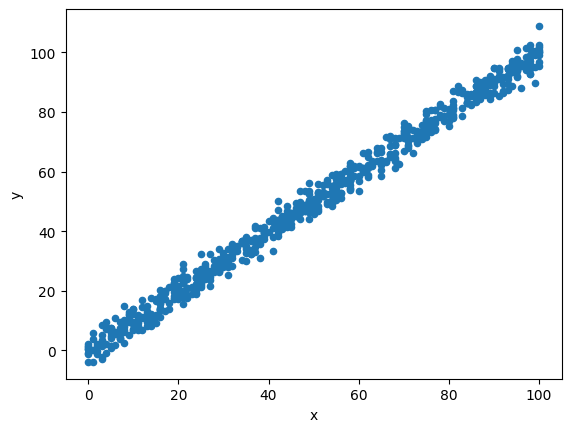

In [10]:
import matplotlib.pyplot as plt
main_data.plot(x='x',y='y',kind='scatter')
plt.show()

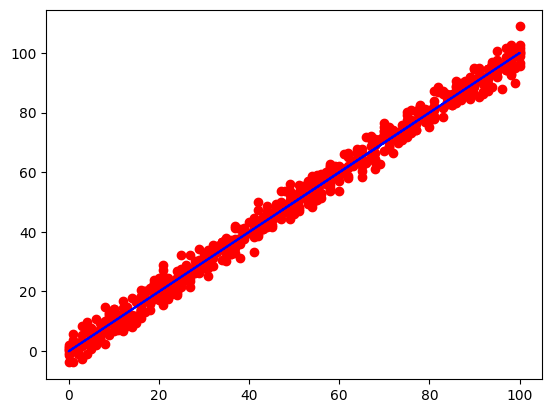

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = main_data['x'].values
X = X.reshape(-1, 1)
y = main_data['y'].values
X_test = test_data['x'].values
X_test = X_test.reshape(-1, 1)
y_test = test_data['y'].values
reg= LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X_test)
plt.scatter(X,y,color= 'red')
plt.plot(X_test,y_pred, color= 'blue')
plt.show()

In [12]:
reg.score(X_test,y_test)

0.9888014444327563

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 9.432922192039305, RMSE: 3.071306268029827
